# Round 1. Computing network properties programmatically

In this exercise, you will get some hands-on experience of NetworkX (https://networkx.github.io/ ) by calculating some basic network properties. The dataset we use here, the Zachary karate club network (Zachary, W., 1997, An information flow model for conflict and fission in small groups), is a famous example of a social network, where the club eventually splits into two parts because of a dispute between two leaders. 

The dataset edge list file `karate_club_network_edge_file.edg` can be found in the course MyCourses page or in the coursedata folder.

To get you started, you may use this notebook or the accompanying Python template `compute_network_properties.py` available in MyCourses. **The usage of the notebook or template is fully optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Beginning of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

**Hint**: Check also the NetworkX online tutorial and index: https://networkx.github.io/documentation/networkx-1.10/tutorial/index.html, https://networkx.github.io/documentation/networkx-1.10/reference/index.html.


In [72]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def visualize_distribution(y_values, x_values, style, x_label, y_label):
    """
    Plots the pre-calculated distribution y(x)
    Returns the figure object

    Parameters
    ----------
    y_values: list
        list of values corresponding to the pre-calculated distribution y(x)
    x_values: list
        the x values for plotting
    style: str
        style of the visualization ('bar' or 'logplot')
    x_label: str
        label of the x axis of the figure
    y_label: str
        label of the y axis of the figure
    """

    # If you are new to matplotlib and want to learn how it works, please read the comments below.
    # The logic is fairly similar to Matlab (also if you use Matlab's handles which are figure objects here)
    # We will use two objects: figure object fig is the whole canvas (or "window");
    # and ax is the pair of axes inside fig where your graph will be plotted.
    #
    # If *very* interested in how all this works, see https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figurehttps://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure
    # and https://matplotlib.org/api/axes_api.html 

    fig = plt.figure() # Creates a new figure canvas for the plot and returns the object as fig
    ax = fig.add_subplot(111) # Creates a new axis object (ax) in the figure fig. The add_subplot(111) means adding the first subplot in an 1x1 grid of subplots; if you'd like to create the first of say four (2x2), you would say add_subplot(221) 
    if style == 'bar': # for plotting a bar chart
        offset = 0
        if mpl.__version__[0] == "2":
            # fix for the different api in matplotlib 2.X 
            offset = 0
        ax.bar(np.array(x_values) - offset, y_values, width=0.5) # plots a bar chart in axes ax with xvalues-offset as the x axis values and y_values as bar heights
        ax.xaxis.set_ticks(x_values)
    elif style == 'logplot': # for plotting on double log axes
        ax.loglog(x_values, y_values, 'k', marker='.') # plots a double log plot in axes ax, with black ('k') dots ('.')
    ax.set_xlabel(x_label) # sets the label of the x axis
    ax.set_ylabel(y_label) # sets the label of the y axis

    return fig # Returns the figure object for showing or saving or both

In [74]:
def visualize_network(network, figure_title):
    """
    Visualizes network "network" with networkx, using nx.draw().
    Returns a figure object. 

    Parameters
    ----------
    network: a networkx Graph object
    figure_title: title of the figure

    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    nx.draw(network) # networkx command for drawing the network
    ax.set_title(figure_title) # sets the title for the figure

    return fig

In [75]:
def calculate_and_visualize_discrete_distribution(input_list, x_label, y_label):
    """
    Calculates and visualizes the discrete probability distribution of a variable
    whose values are given in input_list and returns the figure object

    Parameters
    ----------
    input_list: list
        a list of the variable values, e.g. node degrees
    x_label: str
        label of the x axis of the figure
    y_label: str
        label of the y axis of the figure

    Returns
    -------
    Nothing
    """
    assert len(input_list) > 0, "The input list should not be empty!"
    # Calculate the distribution:
    # np = NumPy, we use the ready-made function bincount thatt counts the number of non-negative integers
    # in the input_list, up to the max value in the input list, and returns an array o counts
    distribution = np.bincount(input_list)  
    n = len(input_list)
    # Normalize:
    distribution = distribution / float(n)
    # Visualize:
    min_range = 0
    max_range = max(input_list) + 1
    x_values = list(range(min_range, max_range)) # range(i,j) gives an iterator from i to j, list(range(i,j)) makes a list out of it.

    fig = visualize_distribution(distribution, x_values, 'bar', x_label, y_label) # uses the function defined above

    return fig

In [76]:
def cdf(input_list):
    """
    Calculates the cumulative distribution function of input_list; cdf(k) = p that value smaller than k

    Parameters
    ----------
    input_list : list
        a list of numbers whose frequencies are used to compute the cdf

    Returns
    -------
    x_points: the values for which the cdf is computed
    cdf: np.array
        cdf for the above values 
    """
    input_array = np.array(input_list)
    x_points = np.unique(input_array) # np.unique gives back a sorted list of unique values in input_array
    cdf = []
    normalizer=float(input_array.size) # input_array.size is the same as len(input_array)

    for x in x_points:

        cdf.append((input_array[np.where(input_array < x)].size)/normalizer) # appends the share of entries in input_list with values < x

    return (x_points, np.array(cdf))

## Data
Let us load the data from the right folder and assign the names for all the plots we will save. If you run this notebook in your machine, please specify the right folder.

In [77]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'
    # YOUR CODE HERE
    #raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

network_fname = os.path.join(course_data_dir, 'karate_club_network_edge_file.edg')

The data directory is /coursedata


# Beginning of the Exercise
Write your code here to compute the requested network properties

### a. Visualization
Load the edge list and visualize the network. To achieve this, you will need to modify the function `load_network` first.
The split of the club should be reflected in the shape of the visualized network.

In [78]:
def load_network(network_fname):
    """
    A function for loading a network from an edgelist (.edg) file.

    Parameters
    ----------
    network_fname: full or relative path (including file name) of the .edg file

    Returns
    -------
    network: the loaded network as NetworkX Graph() object
    """
    net = None
    # YOUR CODE HERE
    #raise NotImplementedError()
    #TODO: use networkx to load in the network
    # See networkx documentation or the Python tutorial for help:
    # https://networkx.github.io/documentation/stable/reference/readwrite/
    # Look for a function that reads an edge file that is weighted.
    net = nx.read_weighted_edgelist(network_fname)
    #read_weighted_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None, encoding='utf-8')

    # The following two assertion statements stops the execution of
    # this program if the network is not correctly loaded:
    assert net is not None, "network was not correctly loaded"
    assert len(net) > 0, "network should contain at least one node"

    return net

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


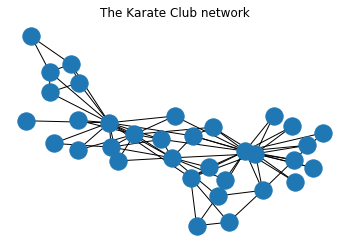

In [79]:
network = load_network(network_fname)
figure_title = 'The Karate Club network'
fig = visualize_network(network, figure_title)

figure_fname = 'karate-club-network.pdf'
fig.savefig(figure_fname)

### b. Edge density
Calculate the edge density of the karate club network. First, write your own code without using the function `density` and then compare your result to the output of `networkx.density` (the corresponding NetworkX function).

In [80]:
def density(network):
    """
    Calculates the network edge density: D = 2*m / n(n-1) where m=# of edges, n=# of nodes

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    D: network edge density
    """
    D = None
    m = network.number_of_edges()
    n = network.number_of_nodes()
    D = 2 * m / (n*(n-1)) # according to formula from class
    # YOUR CODE HERE
    #raise NotImplementedError()
    #TODO: Replace the network density definition!
    # To do this, you need to access some basic properties of a networkx graph
    return D

In [81]:
D_own = density(network)
D_nx = nx.density(network)
print('D from self-written algorithm: ' + str(D_own))
print('D from NetworkX function: ' + str(D_nx))

D from self-written algorithm: 0.13903743315508021
D from NetworkX function: 0.13903743315508021


### c. Average clustering coefficient
Calculate the average clustering coefficient with your own algorithm and compare it to the output of the corresponding NetworkX function. To calculate the average clustering coefficient, modify the `clustering_and_average_clustering` function.

In [97]:
def clustering_and_average_clustering(network):
    """
    Returns the clustering coefficient of each node of network and the
    average clustering coefficient.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    clustering_coefficients: list
        clustering coefficient of each network node in a
    average_clustering: floating point number
        average clustering coefficient
    """
    clustering_coefficients = [] # this is a list of the coefficients of all nodes
    
    #TODO: write a function for calculating the clustering coefficient of each node and the average clustering 
    #coefficient
    no_nodes = network.number_of_nodes()
    nodes = network.nodes()
    
    
    for node in nodes:
        d = len(list(network.neighbors(node)))
        n_links = 0
        if d > 1:
            for i in list(network.neighbors(node)):
                for j in list(network.neighbors(node)):
                    if network.has_edge(i,j):
                        n_links += 1
            n_links /= 2
            clustering_coefficients.append((2 * n_links / (d * (d - 1))))
        else:
            clustering_coefficients.append(0)

    ## Some pseudocode:
    # for node in network:
    #    find neighbors of the node (Graph.neighbors)
    #    calculate the number of neighbors
    #    n_links=0
    #    if number of neighbors > 1:
    #        for neighbor1 in neighbors:
    #            for neighbor2 in neighbors:
    #                if there is a link between neighbor1 and neighbor2 (use has_edge method of the network)
    #                    n_links+=1
    #        each link has been calculated twice => divide by 2
    #        calculate clustering coefficient as c = n_links / (0.5 * n_neighbors * (n_neighbors - 1))
    #        append c to clustering_coefficients
    #    else:
    #        append 0 to clustering_coefficients

    ## Calculate the average clustering coefficient
    average_clustering = sum(clustering_coefficients) / no_nodes # Replace this with a correct definition
    
    # YOUR CODE HERE
    #raise NotImplementedError()

    return (clustering_coefficients, average_clustering)

In [98]:
C_local_own, C_average_own = clustering_and_average_clustering(network)
C_nx = nx.average_clustering(network, count_zeros=True)
## The parameter count_zeros is set to True to include nodes with C=0
## into the average:
print('C from self-written algorithm: ' + str(C_average_own))
print('C from NetworkX function: ' + str(C_nx))

C from self-written algorithm: 0.5706384782076824
C from NetworkX function: 0.5706384782076824


### d. Degree distribution
Calculate the degree distribution $P(k)$ and the complementary cumulative degree distribution 1-CDF($k$) of the network.

Visualize the distributions using `matplotlib.pyplot`. Check tutorial at http://matplotlib.org/users/pyplot_tutorial.html.
To achieve this, you will need to modify the function `get_degrees`.

**NOTE**: In this course, we use a slightly non-standard definition of 1-CDF($k$): 1-CDF($k$) is defined as the probability that a randomly picked node has a degree *larger than or equal to $\geq$* $k$.

In [99]:
def get_degrees(network):
    """
    Returns a list of the degrees of all nodes in the network.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    degrees: list
        degrees of all network node
    """
    degrees = [] # empty list
    nodes = network.nodes()
    for node in nodes:
        degrees.append(len(list(network.neighbors(node))))
        
        
    # YOUR CODE HERE
    #raise NotImplementedError()
    #TODO: Fill in code to compute node degrees
    # Hint: loop over all nodes, and append the degree of each node
    # to the list 'degrees' by computing the number of neighbors each
    # node has
    return degrees

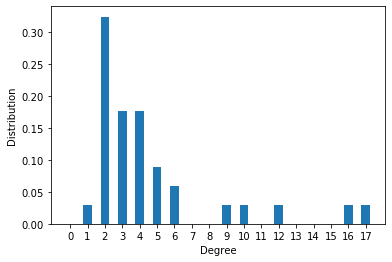

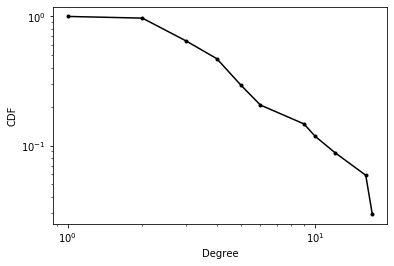

In [100]:
#TODO: set correct labels for the degree distribution
degree_distribution_x_label = 'Degree' # replace
degree_distribution_y_label = 'Distribution' # replace 

# YOUR CODE HERE
#raise NotImplementedError()

degrees = get_degrees(network)
fig = calculate_and_visualize_discrete_distribution(degrees,degree_distribution_x_label,degree_distribution_y_label)

degree_distribution_fig_fname = 'karate-club-degree-dist.pdf'
fig.savefig(degree_distribution_fig_fname)

#TODO: set correct labels for the 1-CDF
cdf_x_label = 'Degree' # replace
cdf_y_label = 'CDF' # replace
# YOUR CODE HERE
#raise NotImplementedError()

cdf_x_values, cdf_vals = cdf(degrees)
fig = visualize_distribution(1-cdf_vals, cdf_x_values, 'logplot',cdf_x_label, cdf_y_label) 
# 1-cdf is the so-called complementary cumulative distribution. 

ccdf_fig_fname = 'karate-club-degree-1-cdf.pdf'
fig.savefig(ccdf_fig_fname)

### e. Average shortest path length
Calculate the average shortest path length $ \langle l \rangle $. Here, you don't need to write your own algorithm. It is sufficient to use the relevant `networkx` function.

In [101]:
#TIP: #TODO: to be replaced with a correct definition using a NetworkX function
l_nx = None 
l_nx = nx.average_shortest_path_length(network, method='dijkstra')
# YOUR CODE HERE
#raise NotImplementedError()
assert l_nx is not None, "Avg. path length has not been computed"
print('<l> from NetworkX function: ' + str(l_nx))

<l> from NetworkX function: 2.408199643493761


### f. Scatter plots
Using `matplotlib.pyplot` library, create a scatter plot of $C_{i}$ as a function of $k_{i}$. Here, you will need to modify the `create_degree_clustering_scatter` function.

In [112]:
def create_degree_clustering_scatter(degrees, clustering, x_label, y_label):
    """
    Creates a scatter plot of the clustering coefficient as a
    function of node degree. Returns a figure object. 

    Parameters
    ----------
    degrees : list
        list of node degrees
    clustering : list
        list of node clustering coefficients in the same order as degrees
    x_label : str
        label of the x axis of the figure
    y_label : label of the y axis of the figure

    Returns
    -------
    fig : Figure object
    """

    ## Insert noise into coordinates to avoid too many exactly overlapping points; this is just a visualization aid!
    n_nodes = len(degrees)
    #print(n_nodes, len(clustering))
    ## The values 0.15, and 0.02 do not contain any deeper meaning.
    noise_degrees = np.random.uniform(-0.15, 0.15, size=n_nodes)
    noise_clustering = np.random.uniform(-0.02, 0.02, size=n_nodes)
    degrees = degrees + noise_degrees
    clustering = clustering + noise_clustering

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
   
    ax.scatter(degrees,clustering,color = 'g',alpha = 0.5)

    #TODO: create degree-clustering scatter plot visualize it and save the figure
    # YOUR CODE HERE
    #raise NotImplementedError()
    ## Hint: Use ax.plot and alpha=0.5 (makes the points semi-transparent)

    return fig

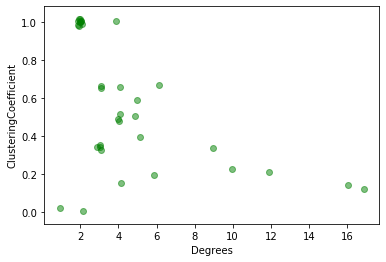

In [113]:
#TODO: set correct labels for the degree--clustering scatter plot
degree_clustering_x_label = 'Degrees' # replace
degree_clustering_y_label = 'ClusteringCoefficient' # replace
# YOUR CODE HERE
#raise NotImplementedError()

fig = create_degree_clustering_scatter(degrees,
                                    C_local_own,
                                    degree_clustering_x_label,
                                    degree_clustering_y_label)


degree_clustering_fig_fname = 'karate-club-degree-clustering.pdf'
fig.savefig(degree_clustering_fig_fname)